In [1]:
import random

In [2]:
def GenerateObservation(y_true,sigma):
    x = random.normalvariate(y_true,sigma)
    return x

In [3]:
def CalculateWeight(sigma1,sigma2,sigma3):
    w1 = (1/sigma1**2)/((1/sigma1**2)+(1/sigma2**2)+(1/sigma3**2))
    return w1

In [4]:
def WeightFusion(y_true,sigma1,sigma2,sigma3):
    y1 = GenerateObservation(y_true,sigma1)
    w1 = CalculateWeight(sigma1,sigma2,sigma3)
    y2 = GenerateObservation(y_true,sigma2)
    w2 = CalculateWeight(sigma2,sigma1,sigma3)
    y3 = GenerateObservation(y_true,sigma3)
    w3 = CalculateWeight(sigma3,sigma1,sigma2)
    y = w1*y1+w2*y2+w3*y3
    return y


In [26]:
import math
#RMSE均方误差
#MAE平均绝对误差
#MAPE平均绝对百分比误差
def mse_fn(y_true,y):
    mse = (y_true-y)**2
    return mse

def mae_fn(y_true,y):
    mae = math.fabs(y_true-y)
    return mae

def mape_fn(y_true,y):
    mape = math.fabs((y_true-y)/y_true)
    mape = mape*100
    return mape

def eval(y_true,y):
    mse = mse_fn(y_true,y)
    rmse = math.sqrt(mse)
    mae = mae_fn(y_true,y)
    mape = mape_fn(y_true,y)
    return [rmse, mae, mape]


In [27]:
def simulation(n):
    y_list = []
    y_true_list=[]
    error_list = []
    for i in range(n):
        y_true = random.randint(1,100)
        y_true_list.append(y_true)
        sigma1 = random.random()
        sigma2 = random.random()
        sigma3 = random.random()
        y = WeightFusion(y_true,sigma1,sigma2,sigma3)
        y_list.append(y)
        error = eval(y_true,y)
        error_list.append(error)
    return y_true_list,y_list,error_list


In [13]:
y_true_list,y_list,error_list=simulation(100)

In [8]:
y_true_list

[100, 42, 94, 28, 99, 58, 20, 92, 52, 85]

In [9]:
y_list

[100.15821737708126,
 41.99827590224819,
 93.97097050483575,
 27.943903496435464,
 99.19693837219776,
 58.263792923944344,
 20.000523593280523,
 92.02912786429661,
 51.54694776092312,
 85.19329734929464]

In [32]:
import matplotlib.pyplot as plt
import numpy as np
def plot_y(y_true,y):
    x = np.linspace(0,len(y_true),len(y))
    plt.scatter(x,y_true,label="y_true",linewidth=1.5)
    plt.scatter(x,y,label="y_pred",linewidth=1.5)
    plt.xlabel("time for simulation")
    plt.ylabel("y")

def plot_metric(score_log,y_ture):
    score_log = np.array(score_log)

    plt.figure(figsize=(10, 6), dpi=300)
    plt.subplot(2, 2, 1)
    plt.scatter(y_ture,score_log[:, 0], c='#d28ad4')
    plt.ylabel('RMSE')

    plt.subplot(2, 2, 2)
    plt.scatter(y_ture,score_log[:, 1], c='#e765eb')
    plt.ylabel('MAE')

    plt.subplot(2, 2, 3)
    plt.scatter(y_ture,score_log[:, 2], c='#6b016d')
    plt.ylabel('MAPE(%)')

    plt.show()


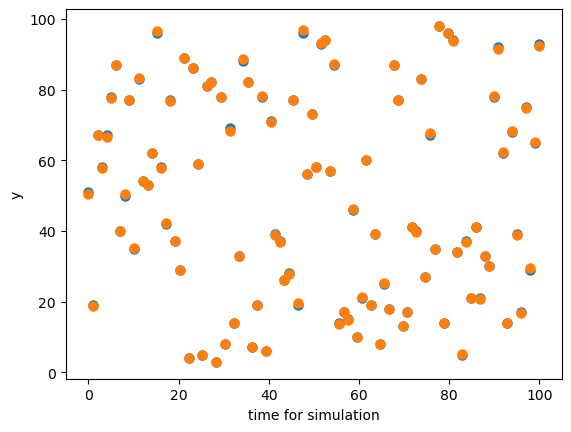

In [29]:
plot_y(y_true_list,y_list)

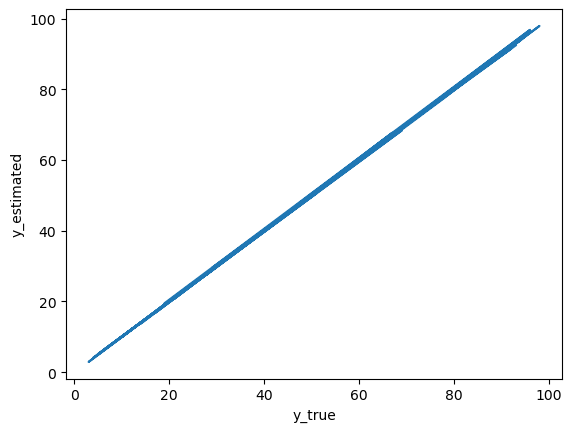

In [30]:
def plot_compare_y(y_true,y):
    plt.plot(y_true,y)
    plt.xlabel("y_true")
    plt.ylabel("y_estimated")

plot_compare_y(y_true_list,y_list)

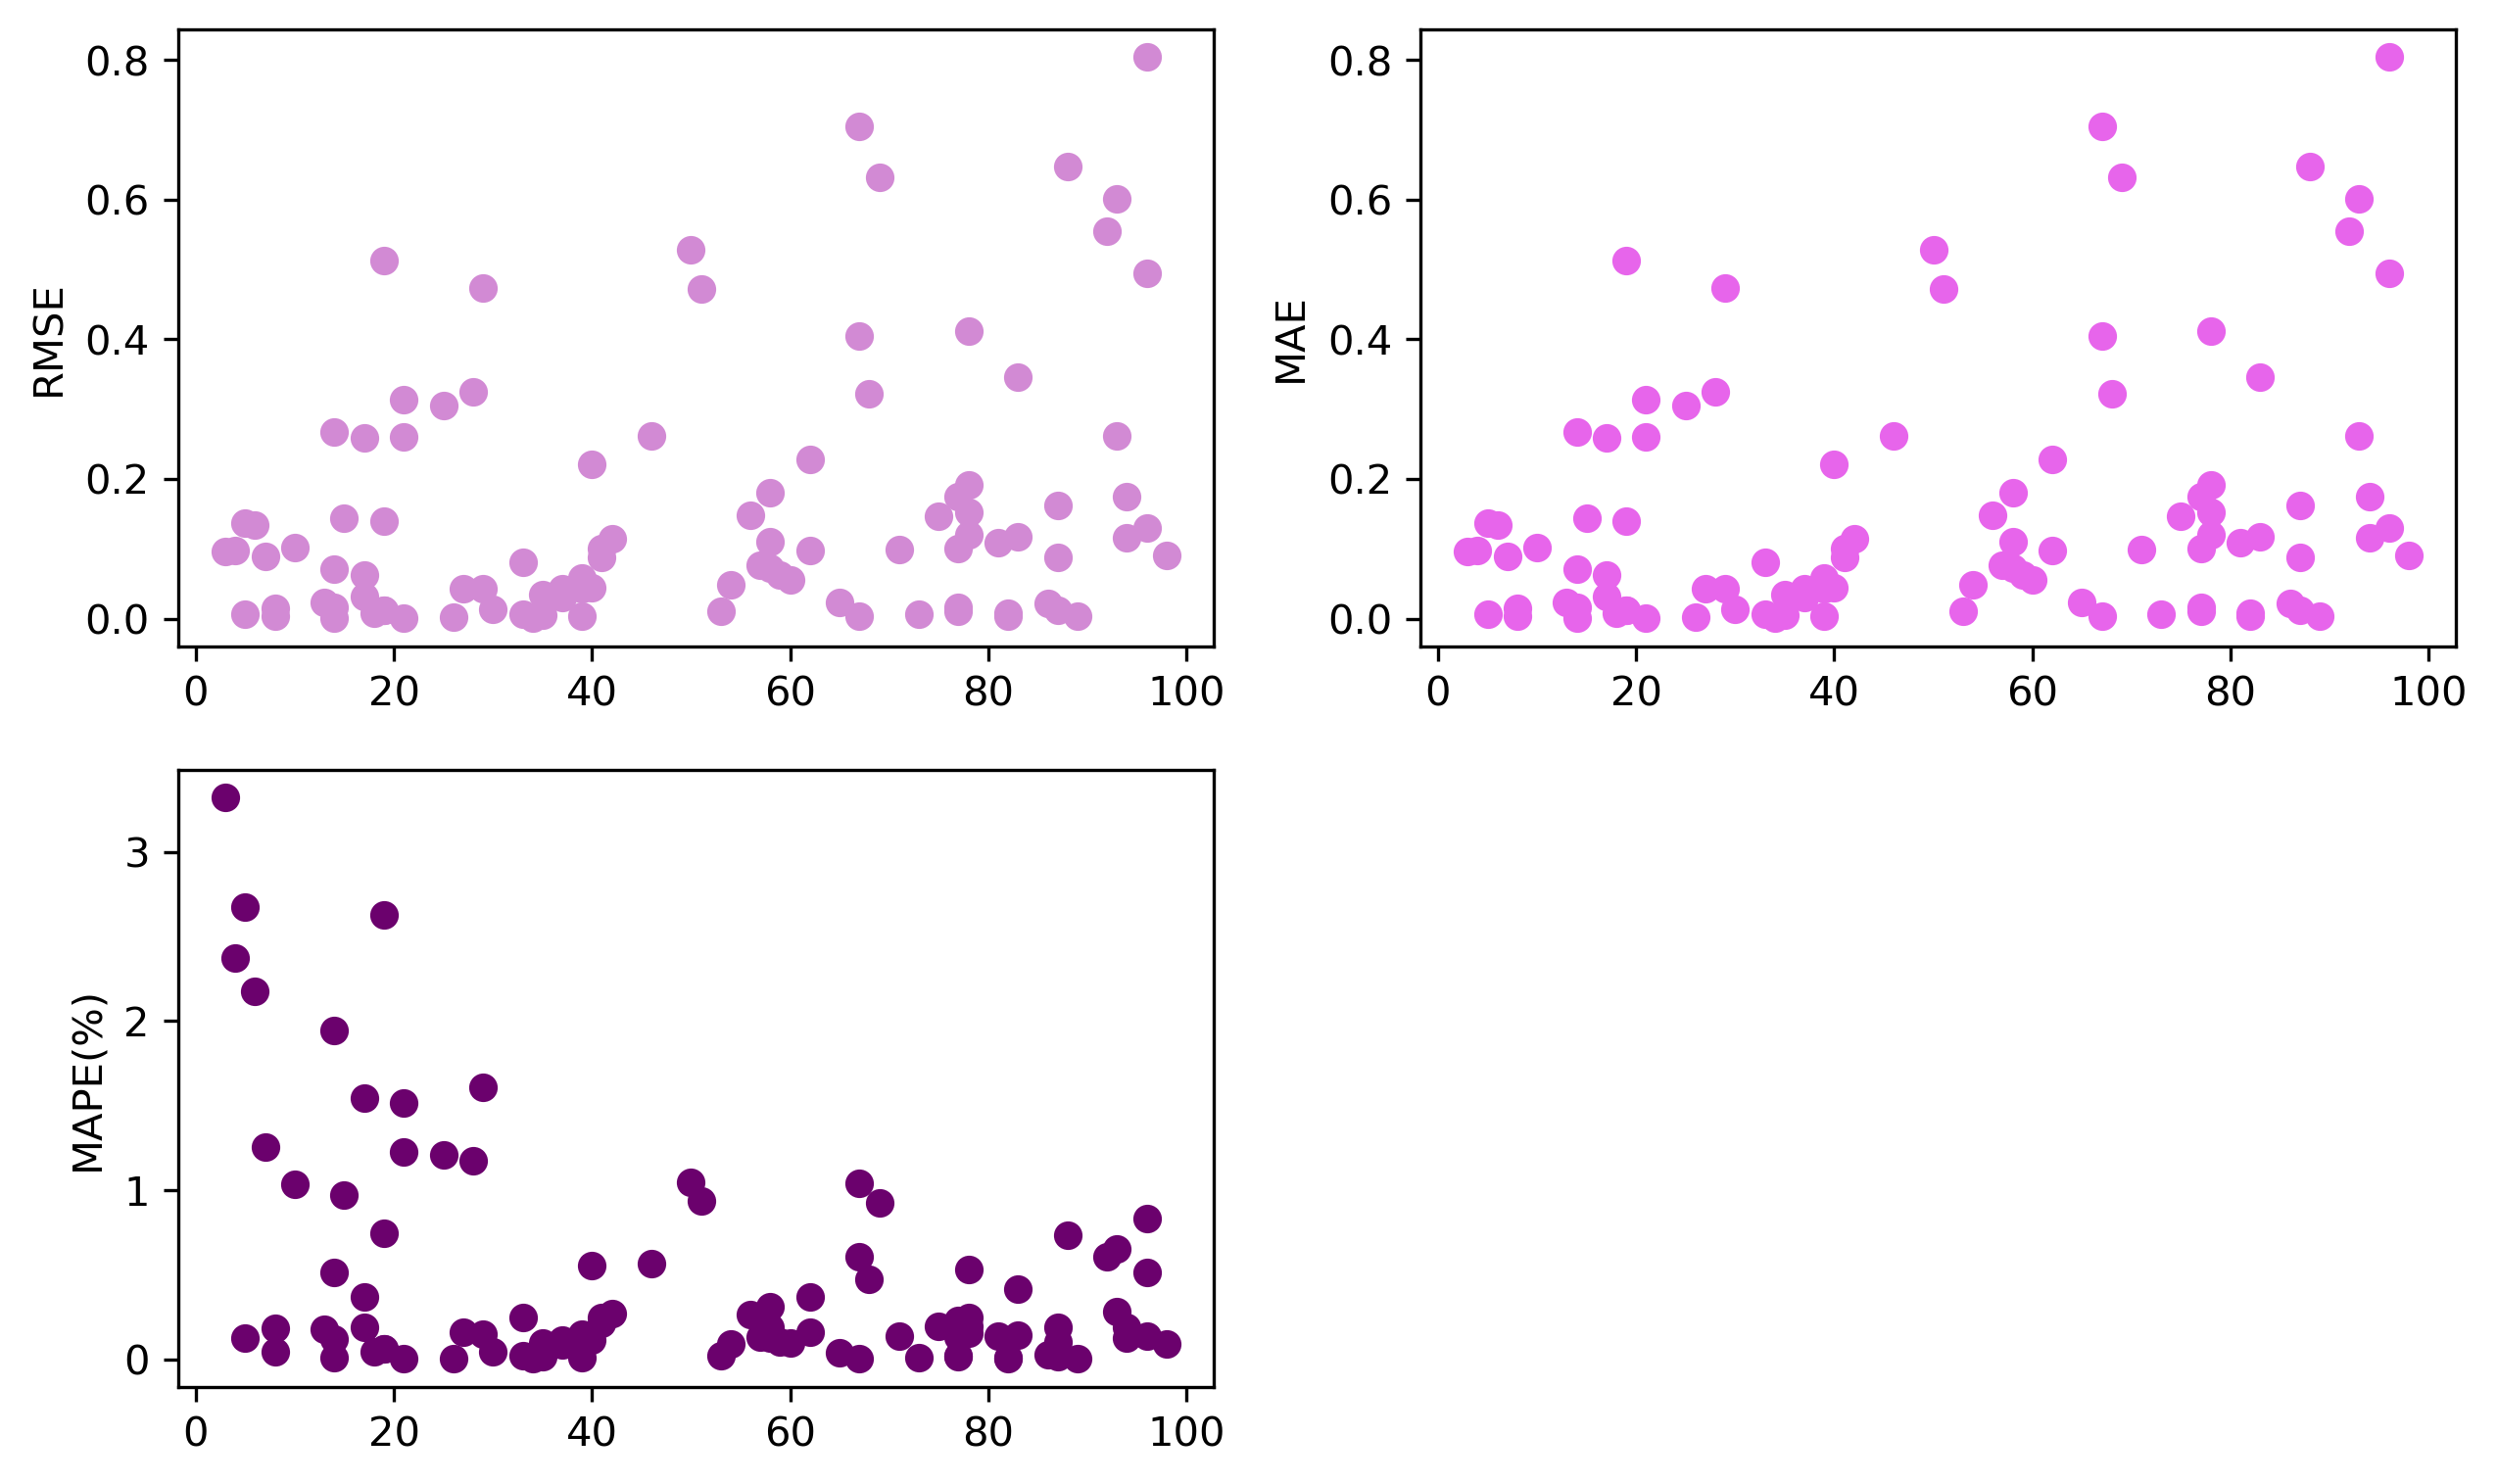

In [33]:
plot_metric(error_list,y_true_list)

In [16]:
error_list

[[0.47165939755309694, 0.47165939755309694, 0.9334551499802394],
 [0.1403617495716034, 0.1403617495716034, 0.7442441244514066],
 [0.0039066355603409875, 0.0039066355603409875, 0.0058311393458272305],
 [0.07273798823516842, 0.07273798823516842, 0.12556779952830427],
 [0.40513291667973306, 0.40513291667973306, 0.6083545690884109],
 [0.41181188788266354, 0.41181188788266354, 0.5307662131348945],
 [0.011390533007556769, 0.011390533007556769, 0.013094281052830108],
 [0.04459398625185429, 0.04459398625185429, 0.1113608150632376],
 [0.5283167276733565, 0.5283167276733565, 1.0455854496811448],
 [0.010852120368952, 0.010852120368952, 0.014095649410120483],
 [0.03422866673499669, 0.03422866673499669, 0.09770064316414312],
 [0.34536658300913814, 0.34536658300913814, 0.4143800635457819],
 [0.04811503380174997, 0.04811503380174997, 0.08902259361248543],
 [0.010156536718511688, 0.010156536718511688, 0.01916694984303833],
 [0.09724145692914021, 0.09724145692914021, 0.157087437164018],
 [0.49429096900